In [ ]:
!pip install pandas
!pip install ydata ydata_profiling
!pip install seaborn
!pip install matplotlib.pyplot

In [5]:
import pandas as pd
#import ydata_profiling
from data_quality import MyDataQuality
#from ydata_profiling import ProfileReport


df = pd.read_csv('exercise_angles.csv')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype, is_categorical_dtype
from ydata_profiling import ProfileReport

In [36]:
df = pd.read_csv('exercise_angles.csv')

dq = MyDataQuality({}) # criando uma instância da classe

### Gráfico de Nulos
###### *No meu dataset, não há nulos.*

/content/data_quality.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulos.index, y=nulos.values, palette='rocket')


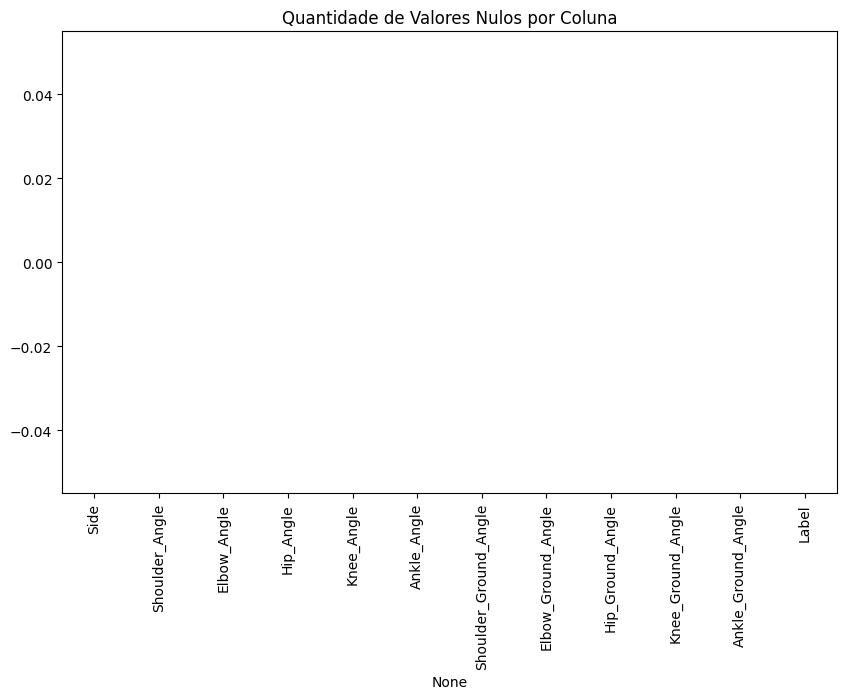

In [35]:
dq.get_graf_nulos(df)

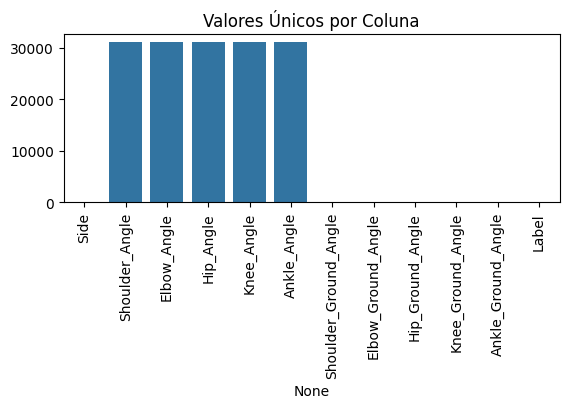

In [38]:
# Gráfico de valores únicos
unicos = dq.get_unicos(df)
plt.subplot(2, 1, 2)
sns.barplot(x=unicos.index, y=unicos.values)
plt.title('Valores Únicos por Coluna')
plt.xticks(rotation=90)
plt.show()

### No meu dataset, algumas colunas (como Shoulder_Ground_Angle e Hip_Ground_Angle) tem poucos valores únicos, já que os Ângulos analisados também são pocuos (normalmente 90º e -90º).

### Gráfico de Distribuição em Colunas Numéricas

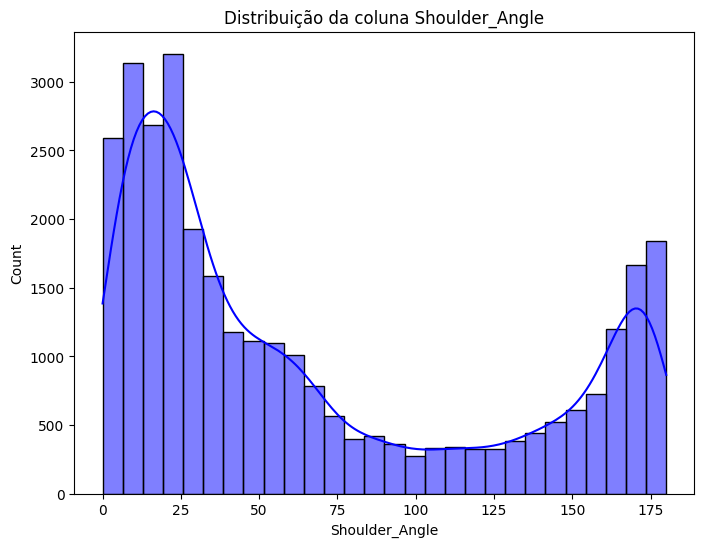

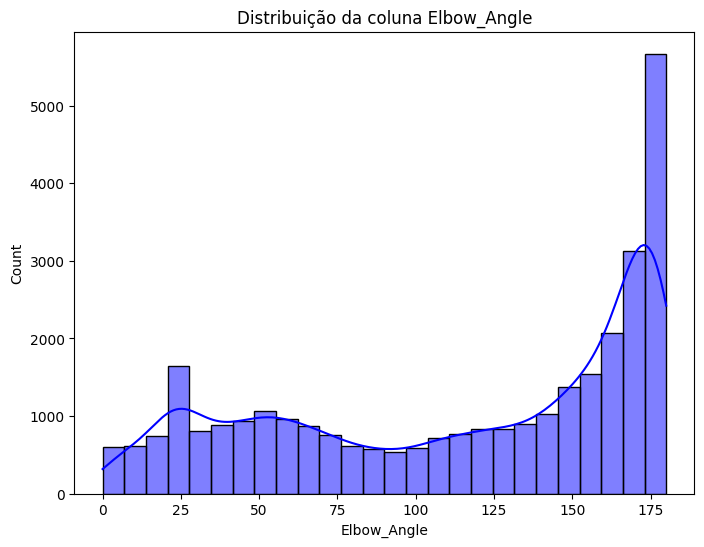

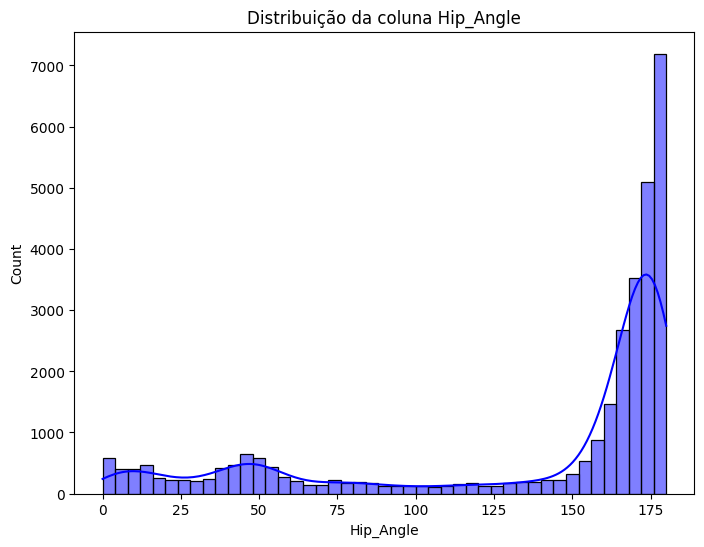

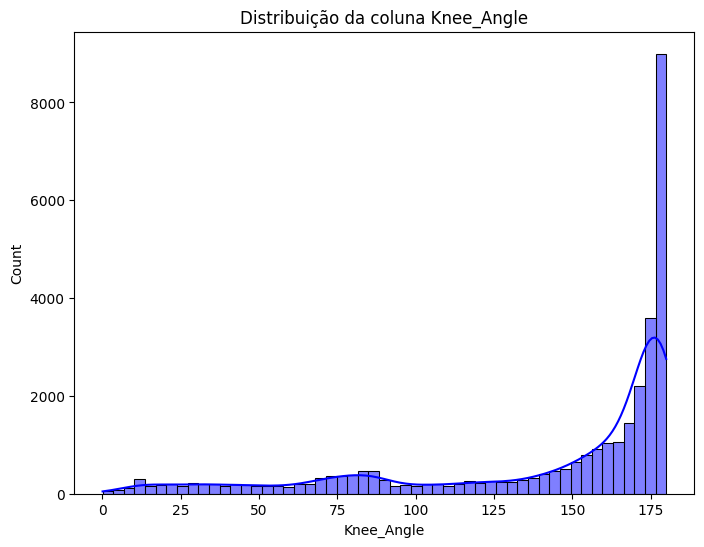

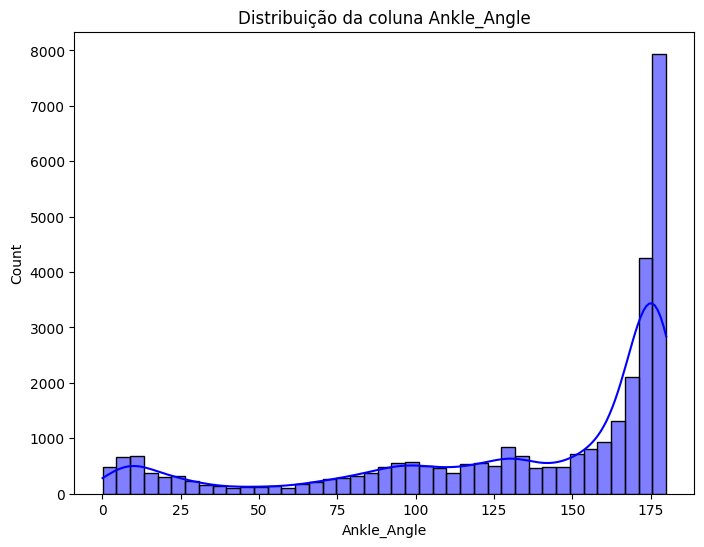

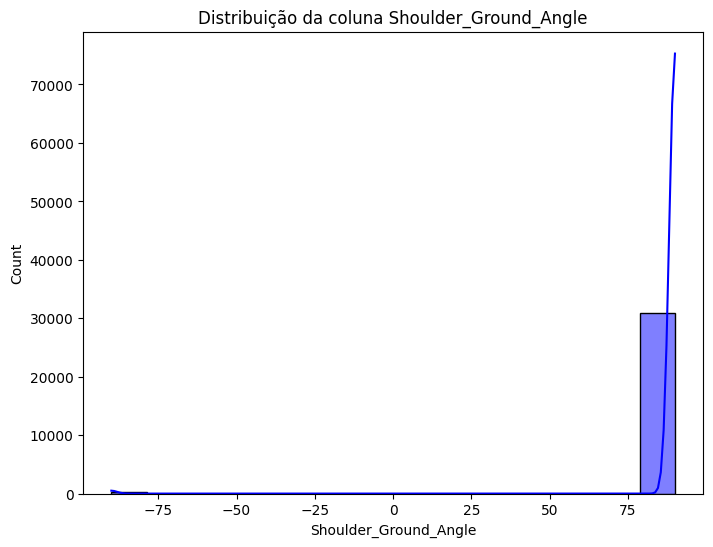

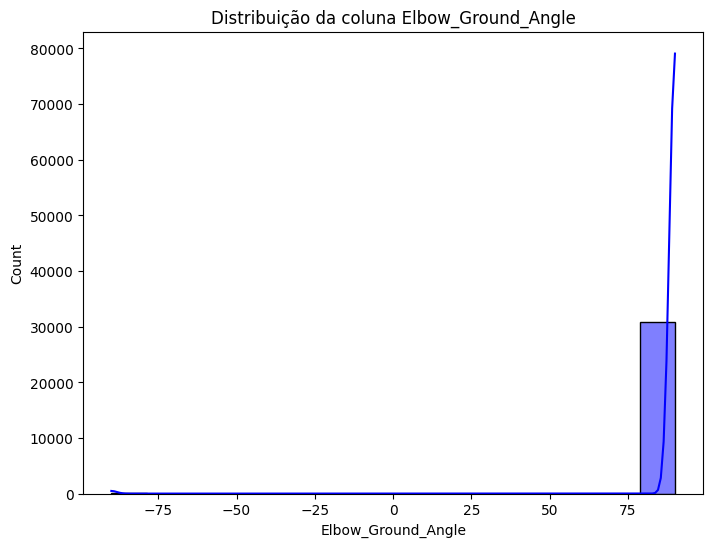

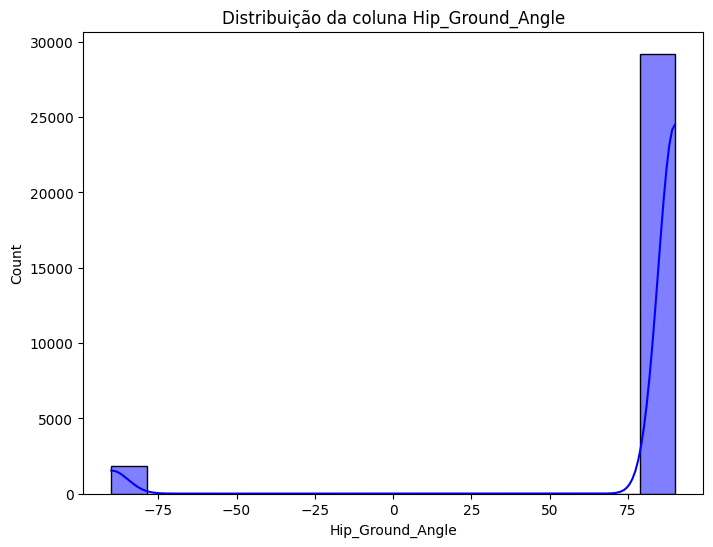

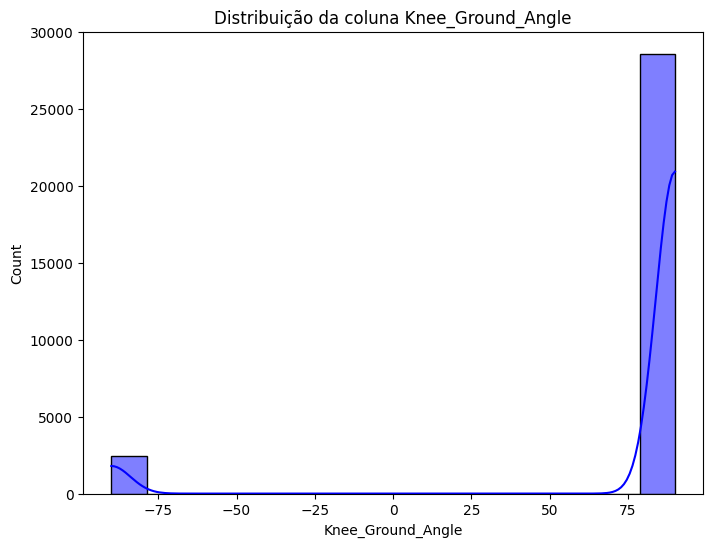

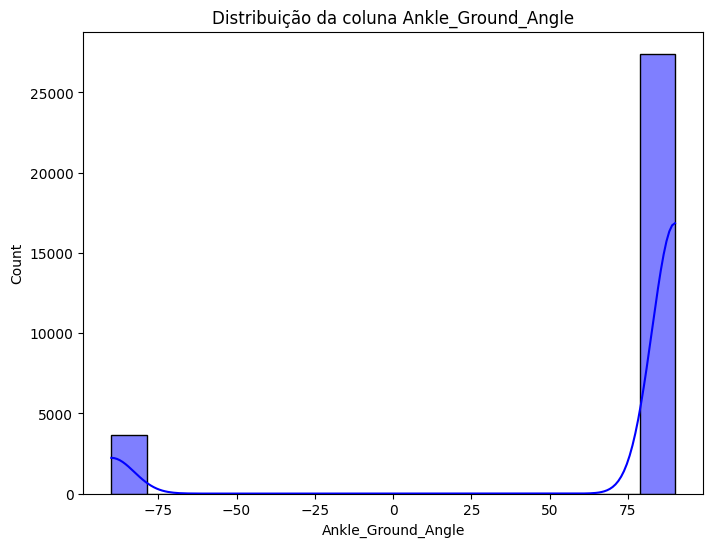

In [34]:
dq.get_graf_numericas(df)

### Gráfico de Distribuição em Colunas Categóricas

/content/data_quality.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=coluna, palette='viridis')


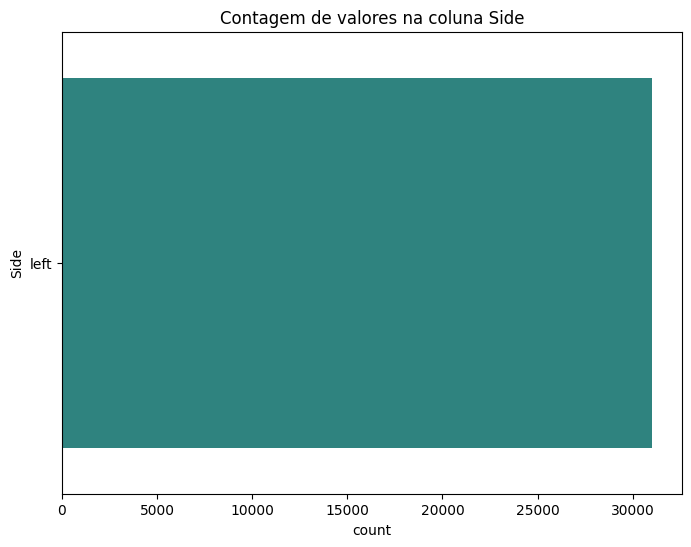

/content/data_quality.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=coluna, palette='viridis')


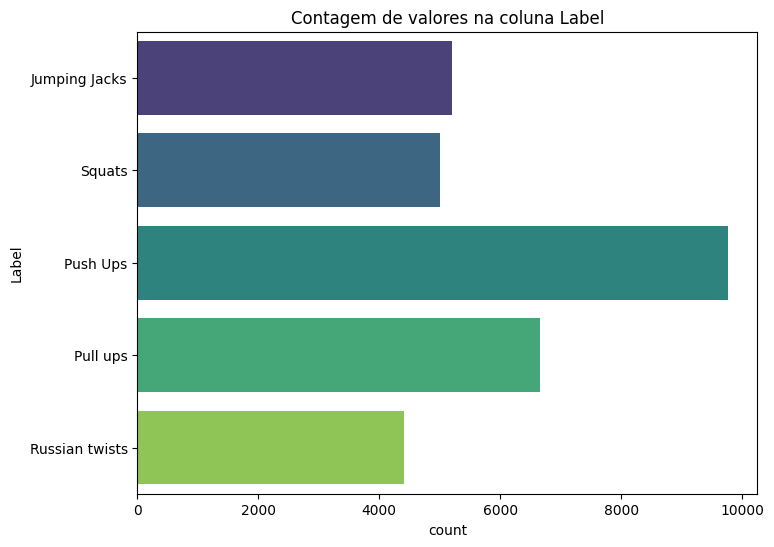

In [33]:
dq.get_graf_categoricas(df)

In [39]:
# Gere o relatório ydata-profiling
dq.generate_ydata_profile(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]